In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.basemap import Basemap
import seaborn as sb

In [2]:
%matplotlib inline

In [3]:
# Load Tim's data I pickled after some pre-processing
dfTimNomadV2=pd.read_pickle('dfTimNomadV2.p')

In [4]:
# quick look at his data
dfTimNomadV2.head()

,411,443,469,489,510,520,547,550,555,560,565,670,lat,lon,chl
0,0.002307,0.003225,0.004674,0.006265,0.007661,0.008944,0.012935,0.013410,0.014040,0.014715,0.015325,0.006588,38.4279,-76.61,38.19
1,0.002035,0.002650,0.003273,0.004149,0.004767,0.005416,0.007338,0.007570,0.007878,0.008208,0.008549,0.003241,38.3680,-76.50,35.01
2,0.001862,0.002271,0.002654,0.003523,0.004367,0.005147,0.007423,0.007691,0.008053,0.008434,0.008822,0.003084,38.3074,-76.44,26.91
3,0.002817,0.003330,0.004096,0.005482,0.006963,0.008243,0.012075,0.012525,0.013127,0.013770,0.014361,0.006154,38.6367,-76.32,47.96
4,0.001735,0.001959,0.002129,0.002882,0.003638,0.004115,0.005079,0.005191,0.005337,0.005507,0.005716,0.003423,38.3047,-76.44,23.55


In [5]:
dfTimNomadV2.describe(percentiles=[.025,.25,.5,.75,.975])

,411,443,469,489,510,520,547,550,555,560,565,670,lat,lon,chl
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000
mean,0.009913,0.009351,0.009408,0.009086,0.007638,0.007200,0.006301,0.006246,0.006105,0.005999,0.005913,0.001289,21.481930,-64.103323,1.544312
std,0.006548,0.005329,0.005020,0.004598,0.004656,0.004964,0.005866,0.005977,0.006091,0.006254,0.006359,0.002629,30.793904,62.277488,4.002408
min,0.000098,0.000365,0.000429,0.000546,0.000502,0.000463,0.000404,0.000410,0.000398,0.000374,0.000362,0.000023,-76.633000,-179.955000,0.000000
2.5%,0.001379,0.001807,0.002109,0.002710,0.002871,0.002967,0.002340,0.002247,0.002097,0.001937,0.001785,0.000073,-61.752887,-147.961150,0.000000
25%,0.005000,0.005335,0.005714,0.006135,0.005511,0.004927,0.003390,0.003257,0.003029,0.002801,0.002599,0.000196,22.893175,-118.275500,0.054000
50%,0.007967,0.008120,0.008610,0.008528,0.006562,0.005780,0.004292,0.004185,0.003970,0.003761,0.003624,0.000385,31.792500,-75.494750,0.301200
75%,0.013895,0.012699,0.012526,0.011118,0.007965,0.007237,0.006257,0.006207,0.006047,0.005934,0.005880,0.001101,36.829250,-54.195000,1.218750
97.5%,0.025597,0.021398,0.020731,0.020735,0.021671,0.022368,0.024289,0.024595,0.024675,0.024803,0.024970,0.008556,71.490175,132.489925,11.829550
max,0.039485,0.031489,0.042271,0.046573,0.050136,0.051616,0.057989,0.059072,0.060087,0.061543,0.062095,0.031832,79.000000,179.907000,72.120000


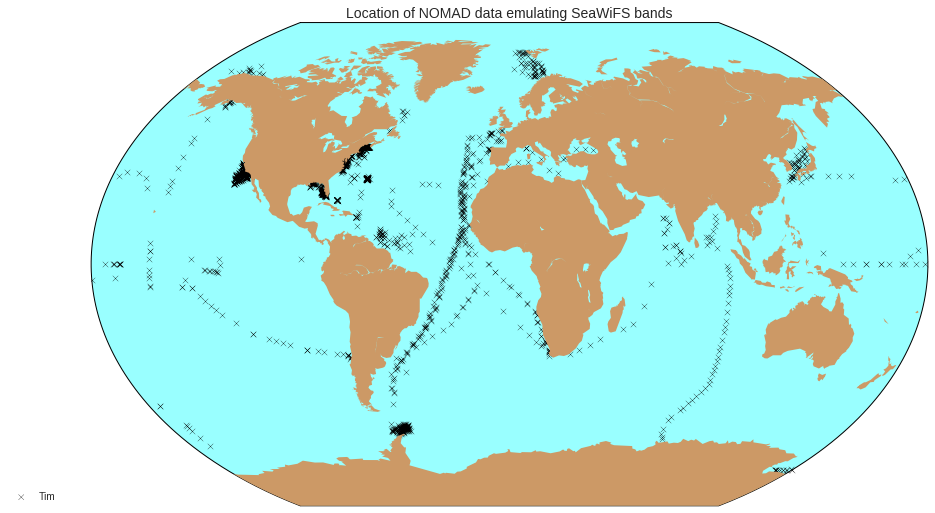

In [6]:
fig,ax=pl.subplots(figsize=(15,15))
m = Basemap(projection='kav7',lon_0=0,ax=ax)
xT,yT=m(dfTimNomadV2.lon.values,dfTimNomadV2.lat.values)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(xT,yT,30,marker='x',color='k',label='Tim')
pl.legend(loc=(-0.1,0))
pl.title('Location of NOMAD data emulating SeaWiFS bands',fontsize=14);

In [7]:
df = dfTimNomadV2.copy()

In [8]:
df['chlCat'] = pd.cut(df.chl,[0,1,10,100],labels=['low chl','med. chl','hi. chl'])

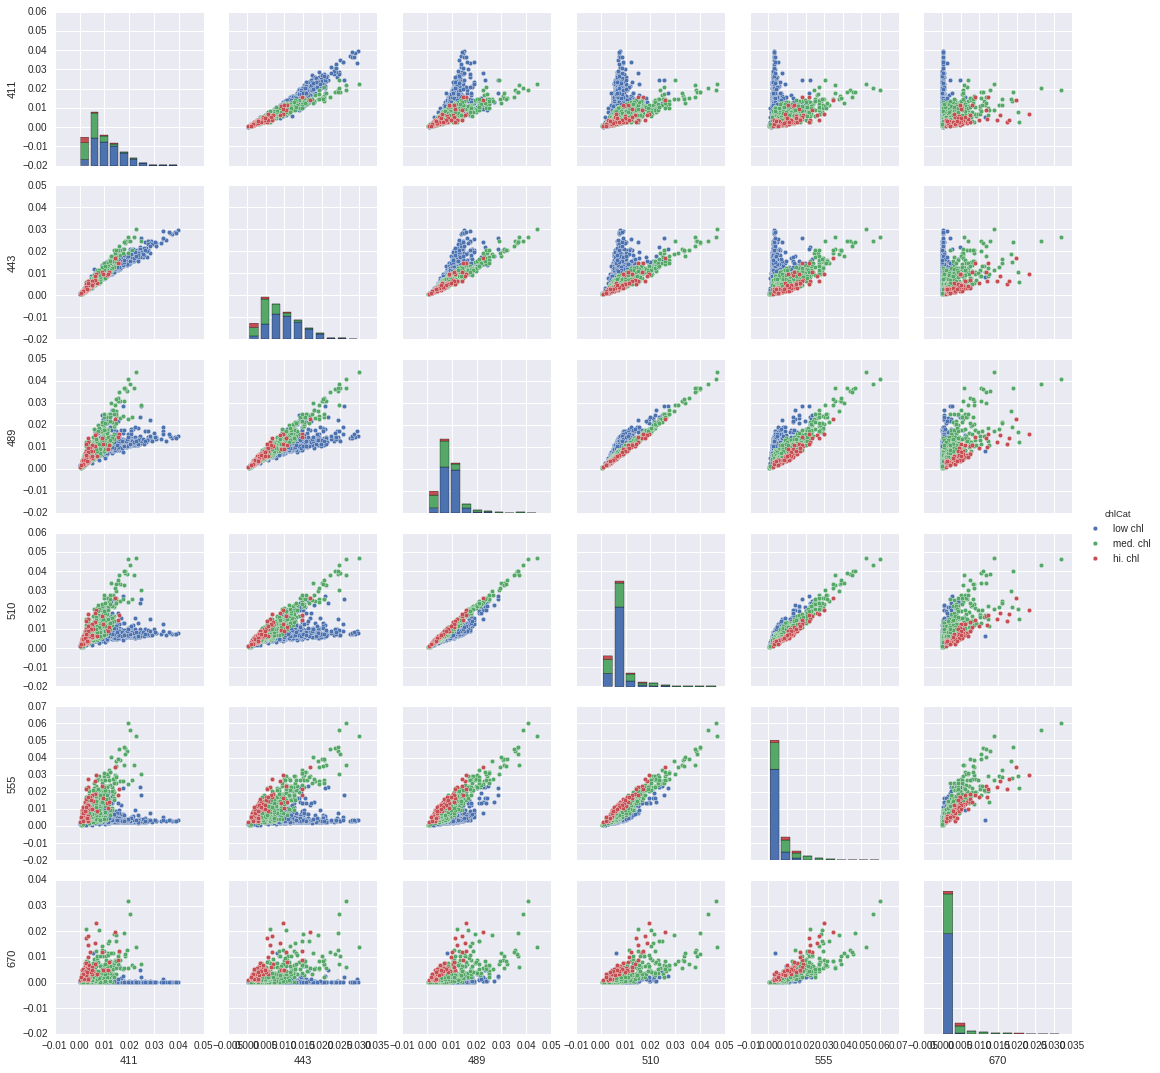

In [9]:
sb.pairplot(df,vars=['411','443','489','510','555','670'],hue='chlCat');